### store_id : 각 파일에서의 상점 고유 번호.
### date : 거래 일자
### time : 거래 시간
### card_id : 카드 번호의 hash 값
### amount : 매출액, 0보다 작은 음수는 거래 취소(환불)
### installments : 할부개월수. 일시불은 빈 문자열
### days_of_week : 요일, 월요일이 0, 일요일은 6
### holyday : 1이면 공휴일, 0이면 공휴일 아님

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv',encoding='euc-kr')
df

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [78]:
df['count'] = np.ones(3362796)

In [79]:
df

,store_id,card_id,days_of_week,price,hour,month,year,day,time,count
0,0,d297bba73f,수,5.0,18,12,2016,14,밤(18-24),1.0
1,0,d297bba73f,수,-5.0,18,12,2016,14,밤(18-24),1.0
2,0,0880849c05,월,144.0,12,12,2016,19,오후(12-18),1.0
3,0,8b4f9e0e95,월,66.0,12,12,2016,19,오후(12-18),1.0
4,0,7ad237eed0,월,24.0,13,12,2016,19,오후(12-18),1.0
...,...,...,...,...,...,...,...,...,...,...
3362791,1799,e254bf70d9,목,600.0,17,7,2018,19,오후(12-18),1.0
3362792,1799,8f41c89891,목,275.0,18,7,2018,19,밤(18-24),1.0
3362793,1799,aeb64fe1fb,일,350.0,14,7,2018,22,오후(12-18),1.0
3362794,1799,57932602d6,수,300.0,18,7,2018,25,밤(18-24),1.0


In [99]:
plt.rc('font', family='Malgun Gothic')

In [7]:
df.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [8]:
df = df.fillna(1)

In [9]:
df.isnull().sum()

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64

In [10]:
df['store_id'].value_counts()

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
1605        1
991         1
1263        1
1530        1
632         1
Name: store_id, Length: 1775, dtype: int64

In [11]:
df['price'] = df.amount * df.installments

In [12]:
string_dt = df.date + ' ' + df.time 
df['dt'] = pd.to_datetime(string_dt) #pd내장의 데이트타임으로 만들어줌.

In [23]:
df['day'] = df.dt.dt.day #import datetime
df['hour'] = df.dt.dt.hour
df['month'] = df.dt.dt.month
df['year'] = df.dt.dt.year

In [24]:
df

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,price,dt,hour,month,year,day
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0,2016-12-14 18:05:31,18,12,2016,14
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0,2016-12-14 18:05:54,18,12,2016,14
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0,2016-12-19 12:42:31,12,12,2016,19
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0,2016-12-19 12:48:08,12,12,2016,19
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0,2016-12-19 13:31:08,13,12,2016,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,600.0,2018-07-19 17:58:31,17,7,2018,19
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,275.0,2018-07-19 18:54:34,18,7,2018,19
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,350.0,2018-07-22 14:46:57,14,7,2018,22
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,300.0,2018-07-25 18:09:13,18,7,2018,25


In [28]:
df.pop('holyday')

0          0
1          0
2          0
3          0
4          0
          ..
3362791    0
3362792    0
3362793    0
3362794    0
3362795    0
Name: holyday, Length: 3362796, dtype: int64

In [ ]:
df.pop('dt')
df.pop('amount')
df.pop('installments')
df.pop('date')
df.pop('time')

In [130]:
df

,store_id,card_id,days_of_week,price,hour,month,year,day,time,count,scat
0,0,d297bba73f,수,5.0,18,12,2016,14,밤(18-24),1.0,0.000005
1,0,d297bba73f,수,-5.0,18,12,2016,14,밤(18-24),1.0,-0.000005
2,0,0880849c05,월,144.0,12,12,2016,19,오후(12-18),1.0,0.000133
3,0,8b4f9e0e95,월,66.0,12,12,2016,19,오후(12-18),1.0,0.000061
4,0,7ad237eed0,월,24.0,13,12,2016,19,오후(12-18),1.0,0.000022
...,...,...,...,...,...,...,...,...,...,...,...
3362791,1799,e254bf70d9,목,600.0,17,7,2018,19,오후(12-18),1.0,0.000556
3362792,1799,8f41c89891,목,275.0,18,7,2018,19,밤(18-24),1.0,0.000255
3362793,1799,aeb64fe1fb,일,350.0,14,7,2018,22,오후(12-18),1.0,0.000324
3362794,1799,57932602d6,수,300.0,18,7,2018,25,밤(18-24),1.0,0.000278


In [42]:
df['time'] = pd.cut(df['hour'], 4, labels = ['새벽(00-06)','오전(06-12)','오후(12-18)','밤(18-24)'])

In [44]:
df[['time','hour']]

,time,hour
0,밤(18-24),18
1,밤(18-24),18
2,오후(12-18),12
3,오후(12-18),12
4,오후(12-18),13
...,...,...
3362791,오후(12-18),17
3362792,밤(18-24),18
3362793,오후(12-18),14
3362794,밤(18-24),18


In [45]:
df['time'].value_counts()

오후(12-18)    1413175
밤(18-24)     1395349
오전(06-12)     363092
새벽(00-06)     191180
Name: time, dtype: int64

In [34]:
df

,store_id,card_id,days_of_week,price,hour,month,year,day
0,0,d297bba73f,2,5.0,18,12,2016,14
1,0,d297bba73f,2,-5.0,18,12,2016,14
2,0,0880849c05,0,144.0,12,12,2016,19
3,0,8b4f9e0e95,0,66.0,12,12,2016,19
4,0,7ad237eed0,0,24.0,13,12,2016,19
...,...,...,...,...,...,...,...,...
3362791,1799,e254bf70d9,3,600.0,17,7,2018,19
3362792,1799,8f41c89891,3,275.0,18,7,2018,19
3362793,1799,aeb64fe1fb,6,350.0,14,7,2018,22
3362794,1799,57932602d6,2,300.0,18,7,2018,25


In [46]:
df['days_of_week'] = df['days_of_week'].apply(lambda x : '월' if x==0 else('화' if x==1 else('수' if x==2 else('목' if x==3 else('금' if x==4 else('토' if x==5 else '일'))))))

In [47]:
df.days_of_week

0          수
1          수
2          월
3          월
4          월
          ..
3362791    목
3362792    목
3362793    일
3362794    수
3362795    월
Name: days_of_week, Length: 3362796, dtype: object

# 총결제 횟수 분포

In [66]:
time_count = df.groupby(['days_of_week','time']).size().loc[['월','화','수','목','금','토','일']]

In [49]:
time_count = pd.DataFrame(time_count)
time_count.columns=['count']
time_count

count
days_of_week time             
월            새벽(00-06)   19576
             오전(06-12)   49765
             오후(12-18)  191239
             밤(18-24)   184267
화            새벽(00-06)   22567
             오전(06-12)   53294
             오후(12-18)  199251
             밤(18-24)   192164
수            새벽(00-06)   23082
             오전(06-12)   52623
             오후(12-18)  198502
             밤(18-24)   197366
목            새벽(00-06)   23943
             오전(06-12)   52788
             오후(12-18)  198575
             밤(18-24)   197514
금            새벽(00-06)   24395
             오전(06-12)   54599
             오후(12-18)  205574
             밤(18-24)   226463
토            새벽(00-06)   39470
             오전(06-12)   56881
             오후(12-18)  217456
             밤(18-24)   219286
일            새벽(00-06)   38147
             오전(06-12)   43142
             오후(12-18)  202578
             밤(18-24)   178289

<AxesSubplot:xlabel='days_of_week', ylabel='count'>

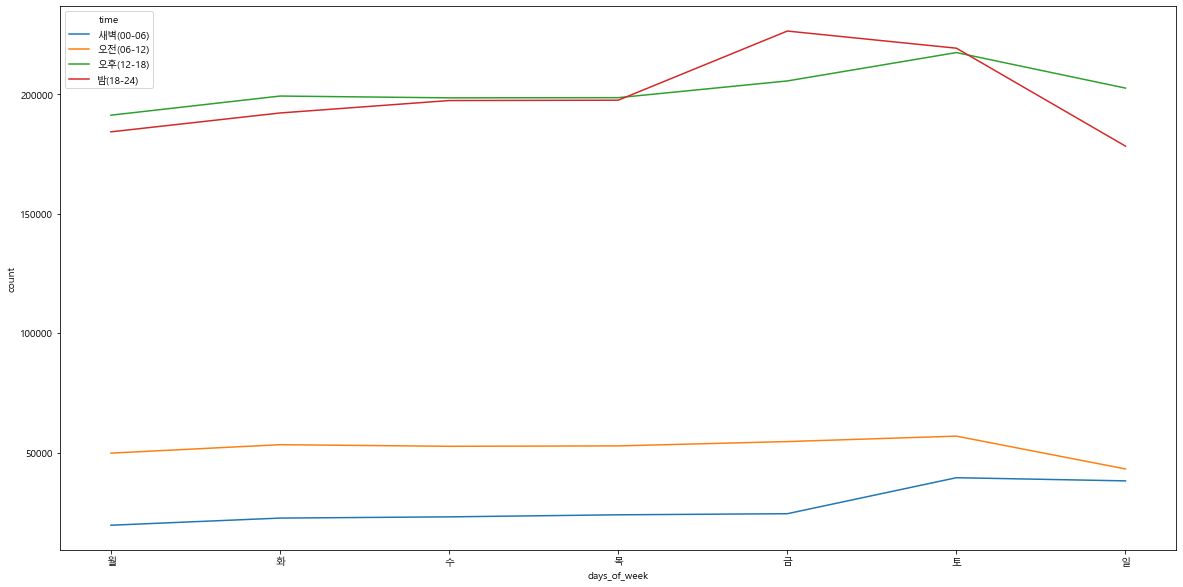

In [60]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=time_count, x="days_of_week", y = 'count', hue="time")

* 시간대 중심으로 보았을 때 새벽과 오전시간대 보다 오후와 밤 시간대의 거래량이 4배를 웃도는 결과를 보여준다.

* 요일 중심으로 본다면 다음날이 휴일인 경우에 그렇지 않은 경우보다 거래량이 많다는 것을 알 수 있다.

# 일/시간별 평균 결제 금액

In [54]:
time_amount_mean

price
days_of_week time                 
월            새벽(00-06)  168.209593
             오전(06-12)  161.665488
             오후(12-18)  184.579965
             밤(18-24)   175.564995
화            새벽(00-06)  230.549785
             오전(06-12)  193.152663
             오후(12-18)  175.493508
             밤(18-24)   180.320429
수            새벽(00-06)  242.144701
             오전(06-12)  181.699295
             오후(12-18)  171.077027
             밤(18-24)   184.509409
목            새벽(00-06)  230.265589
             오전(06-12)  156.204005
             오후(12-18)  185.761873
             밤(18-24)   191.680509
금            새벽(00-06)  227.830621
             오전(06-12)  188.034982
             오후(12-18)  168.023072
             밤(18-24)   178.821830
토            새벽(00-06)  214.946820
             오전(06-12)  151.323728
             오후(12-18)  161.333277
             밤(18-24)   170.467745
일            새벽(00-06)  178.363410
             오전(06-12)  123.104307
             오후(12-18)  139.354935
             밤(18-24)   148.198728

<AxesSubplot:xlabel='days_of_week', ylabel='price'>

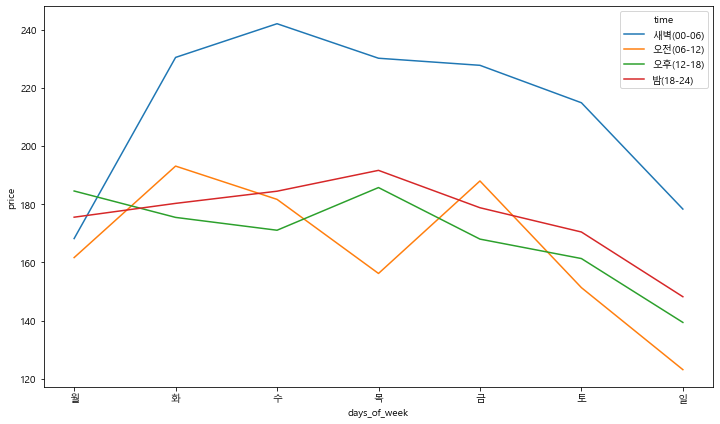

In [64]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=time_amount_mean, x="days_of_week", y="price", hue="time")

* 위의 결과에서 새벽 시간대에서 거래된 거래의 횟수 자체는 타 시간대보다 적은 것을 알 수 있는데 거래량과 반비례하여 거래금액 자체는 월등히 높음을 알 수 있다.

* 또한 일요일에 가까울 수록 거래액수가 줄어든다.


# 추론

* 새벽에 결제되는 소상공인의 가게라면 술집이 대다수를 차지할 것으로 가설을 세우면 다음날이 휴일이 아닌 일요일보다 그렇지 않은 금요일이 거래량이 많은 이유를 들 수 있다.

* 새벽에 열려있는 외부의 소상공인이 아닌 온라인 상의 쇼핑몰이라는 가설을 세우면 결제후 택배를 받는 평균일수가 2~3일이기에 3일내로받지 못하는 요일인 목 금 토 일요일에 점점 줄어드는 것을 볼 수 있다.

* 음주의 값이 평균보다 이하라는 가설을 세우면  평일에는 주로 먹지않고 술보다 비싼 것들을 소비하기에 평균이 높게 나오고 주말은 거래량자체는 많지만 음주의 값이 평균보다 이하여서 평균이 낮아진다.

# 총결제 금액 분포

In [56]:
time_amount_sum=pd.pivot_table(df, index=["days_of_week", "time"], values=["price"], aggfunc=np.sum).loc[['월','화','수','목','금','토','일']]

In [57]:
time_amount_sum

price
days_of_week time                 
월            새벽(00-06)   3292871.0
             오전(06-12)   8045283.0
             오후(12-18)  35298888.0
             밤(18-24)   32350835.0
화            새벽(00-06)   5202817.0
             오전(06-12)  10293878.0
             오후(12-18)  34967257.0
             밤(18-24)   34651095.0
수            새벽(00-06)   5589184.0
             오전(06-12)   9561562.0
             오후(12-18)  33959132.0
             밤(18-24)   36415884.0
목            새벽(00-06)   5513249.0
             오전(06-12)   8245697.0
             오후(12-18)  36887664.0
             밤(18-24)   37859584.0
금            새벽(00-06)   5557928.0
             오전(06-12)  10266522.0
             오후(12-18)  34541175.0
             밤(18-24)   40496528.0
토            새벽(00-06)   8483951.0
             오전(06-12)   8607445.0
             오후(12-18)  35082889.0
             밤(18-24)   37381190.0
일            새벽(00-06)   6804029.0
             오전(06-12)   5310966.0
             오후(12-18)  28230244.0
             밤(18-24)   26422203.0

In [93]:
df[df['price']> df.price.mean()].days_of_week.value_counts()

토    123634
금    111639
목     99037
수     98185
일     97052
화     96311
월     88275
Name: days_of_week, dtype: int64

In [95]:
df[df['price']< df.price.mean()].days_of_week.value_counts()

토    409459
금    399392
목    373783
수    373388
화    370965
일    365104
월    356572
Name: days_of_week, dtype: int64

<AxesSubplot:xlabel='days_of_week', ylabel='price'>

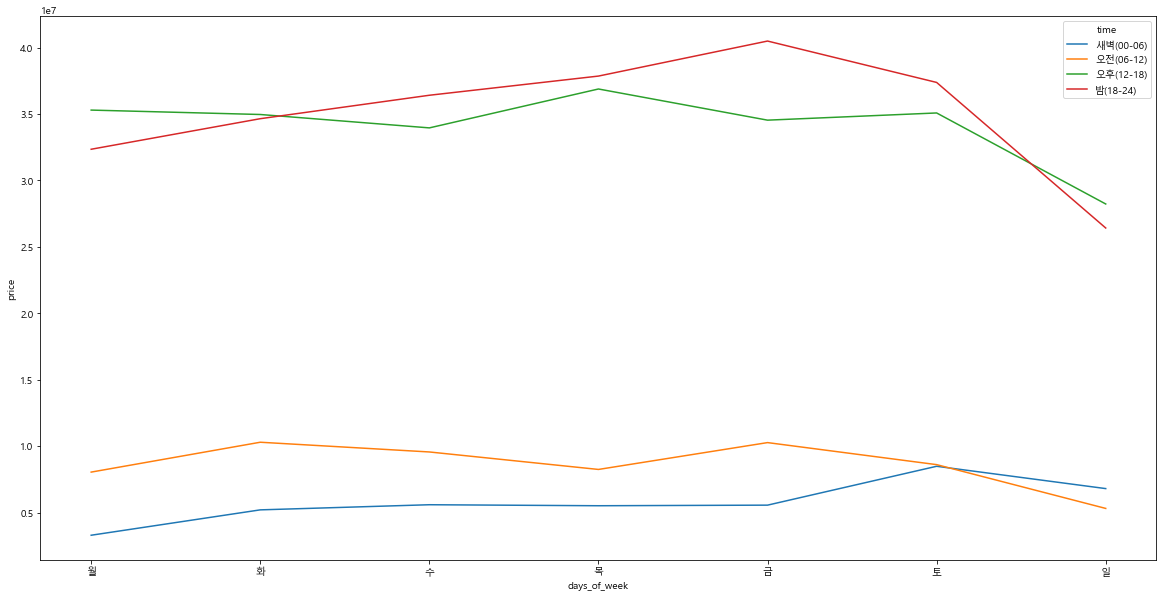

In [58]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=time_amount_sum, x="days_of_week", y="price", hue="time")

* 거래량 자체는 금, 토같은 경우가 합계자체는 주말이 높을 가능성이 크다.

* 오후와 밤에 시간대의 거래량이 높은 이유도 마찬가지다.

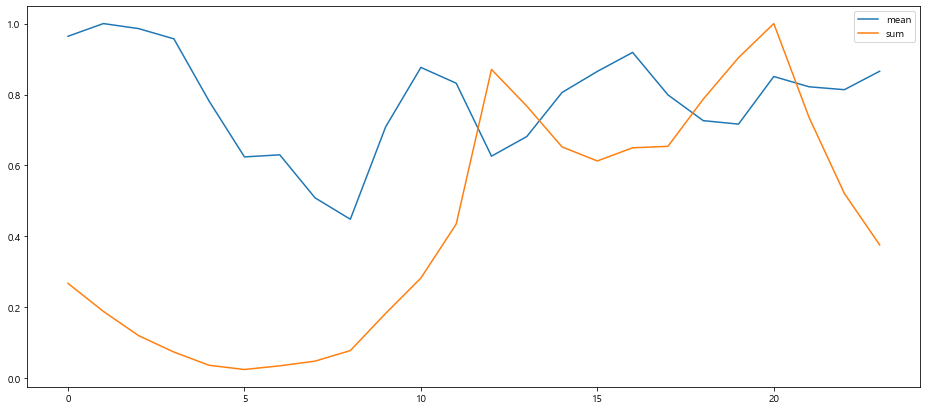

In [35]:
plt.figure(figsize=(16,7))
# 한번에 결제 하는 금액
plt.plot(df.groupby('hour')['price'].mean()/max(df.groupby('hour')['price'].mean()), label = 'mean') #경향성
# 총 결제 금액
plt.plot(df.groupby('hour')['price'].sum()/max(df.groupby('hour')['price'].sum()), label = 'sum')
plt.legend()

* 거래 량 자체는 새벽이 적은데 거래금액은 새벽이 높음을 알 수 있다. 거래량이 적은 이유는 술의 경우 한명이 계산하는 경우가 크기에 큰 거래 위주로 발생할 가능성이 있다.
* 또한 거래금액은 점심과 저녁시간대가 높다.

In [37]:
drop_minus = df[df.price > 0]

(0.0, 600.0)

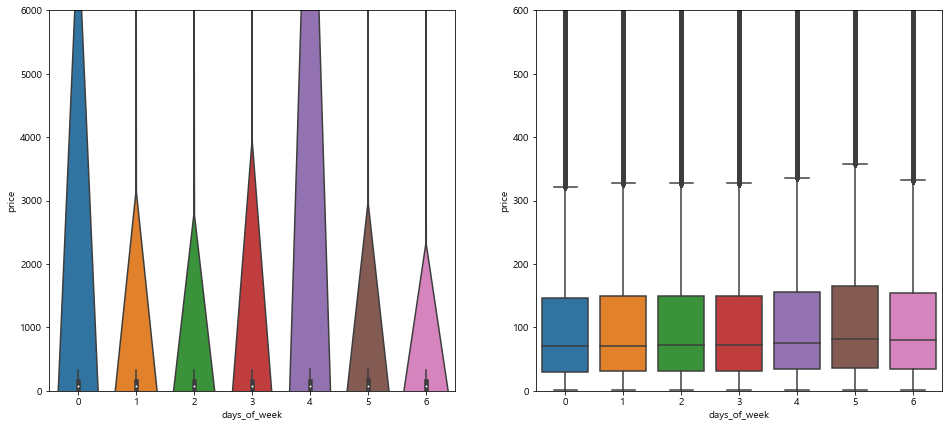

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))

plt.subplot(1,2,1)
ax =sns.violinplot(data=drop_minus,x = 'days_of_week',y='price')
ax.set_ylim(0,6000)

plt.subplot(1,2,2)
ax =sns.boxplot(data=drop_minus,x = 'days_of_week',y='price')
ax.set_ylim(0,600)

* 월요일과 금요일에 거래금액자체가 월등히 높은 것을 알 수 있다. 그렇지만 평균자체는 어느 요일이든 크게 차이나지 않는다.

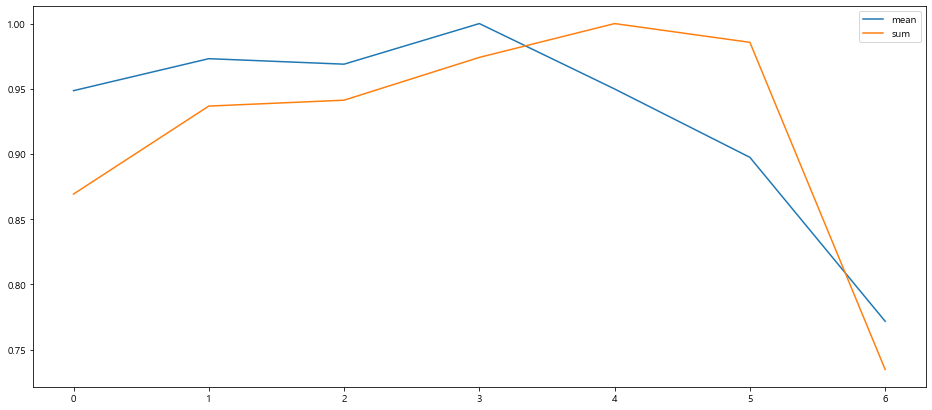

In [40]:
plt.figure(figsize=(16,7))
# 한번에 결제 하는 금액
plt.plot(df.groupby('days_of_week')['price'].mean()/max(df.groupby('days_of_week')['price'].mean()), label = 'mean')
# 총 결제 금액
plt.plot(df.groupby('days_of_week')['price'].sum()/max(df.groupby('days_of_week')['price'].sum()), label = 'sum')
plt.legend()

* 공휴일은 돈을 적게 쓰는 것을 확인 할 수 있다.

(0.0, 7000.0)

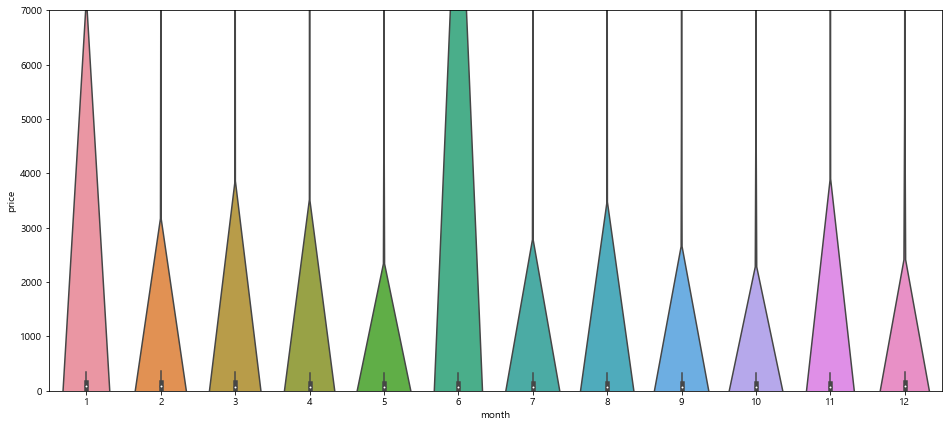

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))

ax =sns.violinplot(data=drop_minus,x = 'month',y='price')
ax.set_ylim(0,7000)

* 계절로 봤을 때 겨울과 여름으로 인한 새옷 장만과 연말 보너스를 받은 경우가 있을 수도 있다. 

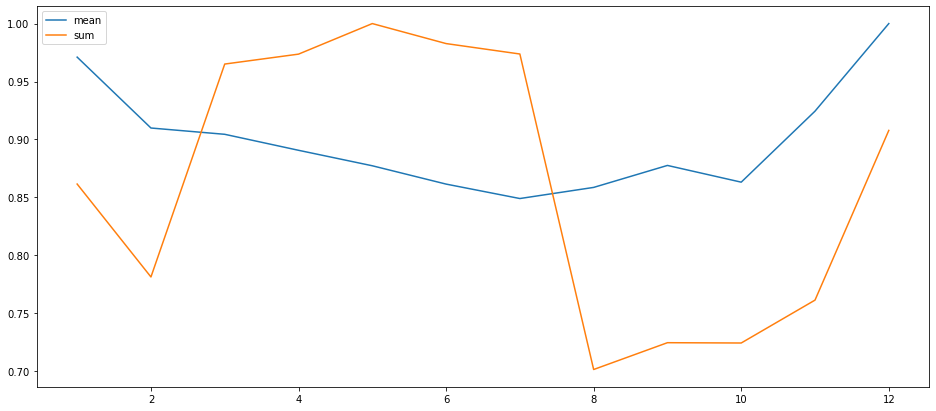

In [149]:
plt.figure(figsize=(16,7))
# 한번에 결제 하는 금액
plt.plot(df.groupby('month')['price'].mean()/max(df.groupby('month')['price'].mean()), label = 'mean')
# 총 결제 금액
plt.plot(df.groupby('month')['price'].sum()/max(df.groupby('month')['price'].sum()), label = 'sum')
plt.legend()

* 봄철에 소비를 많이하는 경향이 있으며 12월같은 경우 소득공제를 위해 큰 금액을 소비하는 경우가 있다.

(0.0, 4000.0)

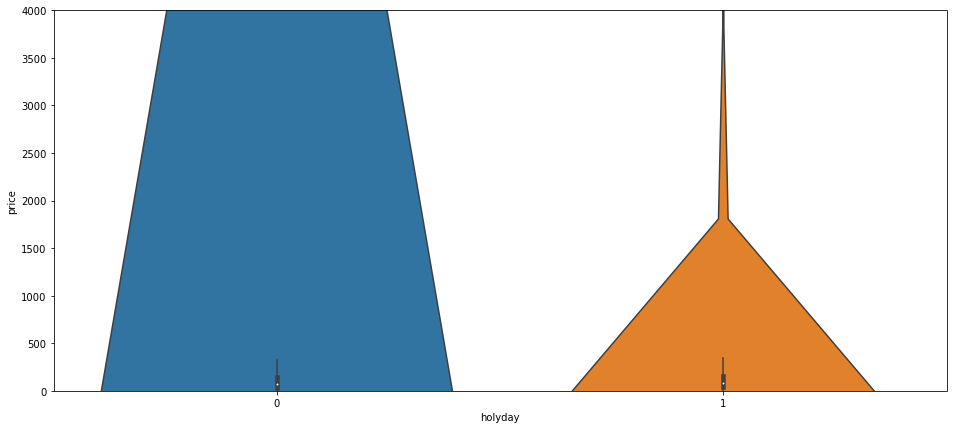

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))

ax =sns.violinplot(data=drop_minus,x = 'holyday',y='price')
ax.set_ylim(0,4000)

* 주말이라 상점이 닫는 경우가 있다.

(array([702420., 678853., 487515., 353919., 220368., 200721., 127886.,
         87520., 105263.,  49901.,  48923.,  36818.,  24164.,  22588.,
         15689.,  16496.,  17017.,   8084.,   8465.,   5868.]),
 array([  0.  ,  29.95,  59.9 ,  89.85, 119.8 , 149.75, 179.7 , 209.65,
        239.6 , 269.55, 299.5 , 329.45, 359.4 , 389.35, 419.3 , 449.25,
        479.2 , 509.15, 539.1 , 569.05, 599.  ]),
 <BarContainer object of 20 artists>)

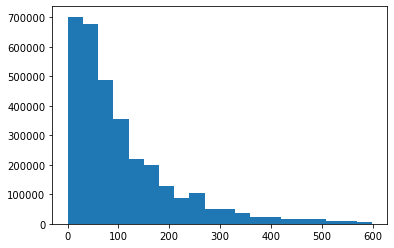

In [146]:
plt.hist(drop_minus['price'][drop_minus['price'] < 600], bins = 20) #이상치 제거

In [11]:
df_2017 = df[df.year == 2017]

In [20]:
def count(x):
    x['len'] = len(x.month.unique())
    return x
df_2017 = df_2017.groupby('store_id').apply(count)

In [86]:
df_2017

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,price,dt,hour,month,year,len
1635,0,2017-01-01,00:27:46,1e3035e497,36,1.0,6,1,36.0,2017-01-01 00:27:46,0,1,2017,12
1636,0,2017-01-01,00:40:24,357033166d,69,1.0,6,1,69.0,2017-01-01 00:40:24,0,1,2017,12
1637,0,2017-01-01,00:44:38,3755cf6251,85,1.0,6,1,85.0,2017-01-01 00:44:38,0,1,2017,12
1638,0,2017-01-01,01:05:36,a615f8b868,176,1.0,6,1,176.0,2017-01-01 01:05:36,1,1,2017,12
1639,0,2017-01-01,01:25:39,66875ae804,123,1.0,6,1,123.0,2017-01-01 01:25:39,1,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361793,1798,2017-12-30,15:01:59,c94d224db7,15,1.0,5,0,15.0,2017-12-30 15:01:59,15,12,2017,12
3361794,1798,2017-12-30,21:10:30,0257579257,35,1.0,5,0,35.0,2017-12-30 21:10:30,21,12,2017,12
3361795,1798,2017-12-31,12:58:34,9e505d2b24,52,1.0,6,0,52.0,2017-12-31 12:58:34,12,12,2017,12
3361796,1798,2017-12-31,14:24:17,e8ec119688,95,1.0,6,0,95.0,2017-12-31 14:24:17,14,12,2017,12


In [21]:
df_2017 = df_2017[df_2017.len == 12]

In [69]:
df_2017.groupby('store_id').price.sum().sort_values().index

Int64Index([1340,   74,  821, 1612,  878, 1401,  921, 1785,  253, 1050,
            ...
             597,  492,  810, 1186,  195, 1024, 1076,    0,  958,  753],
           dtype='int64', name='store_id', length=699)

In [73]:
indexes = list(df_2017.groupby('store_id').price.sum().sort_values().index)
up = df_2017[df_2017.store_id.isin(indexes[round(len(indexes)*0.7):])]
down = df_2017[df_2017.store_id.isin(indexes[:round(len(indexes)*0.3)])]

In [87]:
up

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,price,dt,hour,month,year,len
1635,0,2017-01-01,00:27:46,1e3035e497,36,1.0,6,1,36.0,2017-01-01 00:27:46,0,1,2017,12
1636,0,2017-01-01,00:40:24,357033166d,69,1.0,6,1,69.0,2017-01-01 00:40:24,0,1,2017,12
1637,0,2017-01-01,00:44:38,3755cf6251,85,1.0,6,1,85.0,2017-01-01 00:44:38,0,1,2017,12
1638,0,2017-01-01,01:05:36,a615f8b868,176,1.0,6,1,176.0,2017-01-01 01:05:36,1,1,2017,12
1639,0,2017-01-01,01:25:39,66875ae804,123,1.0,6,1,123.0,2017-01-01 01:25:39,1,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333003,1790,2017-12-28,21:44:15,0ab0f0c7ac,1330,1.0,3,0,1330.0,2017-12-28 21:44:15,21,12,2017,12
3333004,1790,2017-12-29,19:31:40,8434f4b71c,340,1.0,4,0,340.0,2017-12-29 19:31:40,19,12,2017,12
3333005,1790,2017-12-29,19:44:43,4be7447a29,1750,1.0,4,0,1750.0,2017-12-29 19:44:43,19,12,2017,12
3333006,1790,2017-12-29,22:07:47,4bd9afacb8,1915,1.0,4,0,1915.0,2017-12-29 22:07:47,22,12,2017,12


In [88]:
down

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,price,dt,hour,month,year,len
85731,3,2017-01-02,11:27:47,448a9340ab,182,1.0,0,0,182.0,2017-01-02 11:27:47,11,1,2017,12
85732,3,2017-01-02,15:21:52,e76686dbf1,700,1.0,0,0,700.0,2017-01-02 15:21:52,15,1,2017,12
85733,3,2017-01-05,16:21:12,f06f14f1ae,135,1.0,3,0,135.0,2017-01-05 16:21:12,16,1,2017,12
85734,3,2017-01-09,15:39:51,1ea37fb592,100,1.0,0,0,100.0,2017-01-09 15:39:51,15,1,2017,12
85735,3,2017-01-09,16:44:56,d71016d292,80,1.0,0,0,80.0,2017-01-09 16:44:56,16,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361793,1798,2017-12-30,15:01:59,c94d224db7,15,1.0,5,0,15.0,2017-12-30 15:01:59,15,12,2017,12
3361794,1798,2017-12-30,21:10:30,0257579257,35,1.0,5,0,35.0,2017-12-30 21:10:30,21,12,2017,12
3361795,1798,2017-12-31,12:58:34,9e505d2b24,52,1.0,6,0,52.0,2017-12-31 12:58:34,12,12,2017,12
3361796,1798,2017-12-31,14:24:17,e8ec119688,95,1.0,6,0,95.0,2017-12-31 14:24:17,14,12,2017,12


(0.0, 600.0)

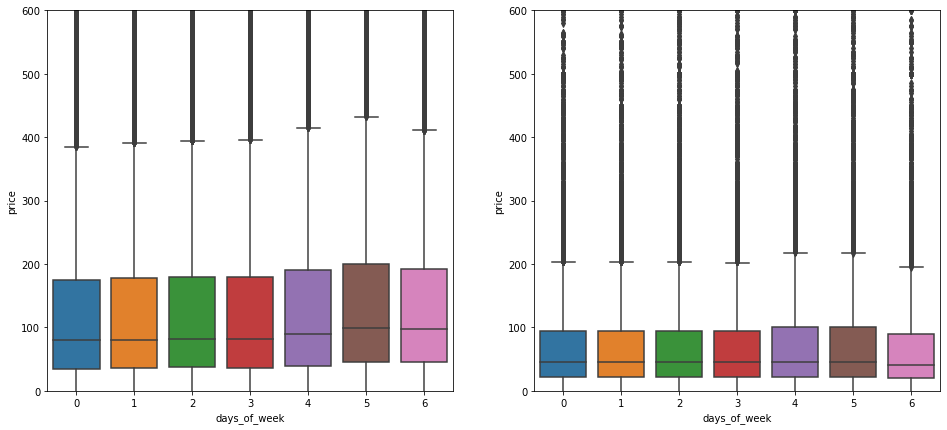

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))

plt.subplot(1,2,1)
ax =sns.boxplot(data=up,x = 'days_of_week',y='price')
ax.set_ylim(0,600)

plt.subplot(1,2,2)
ax =sns.boxplot(data=down,x = 'days_of_week',y='price')
ax.set_ylim(0,600)

* 금액대 자체가 다른 경우가 크다 2배가격의 물건의 차이가 나는 듯. 편의점과 음식점의 비교라고 생각해도 좋다.

(0.0, 600.0)

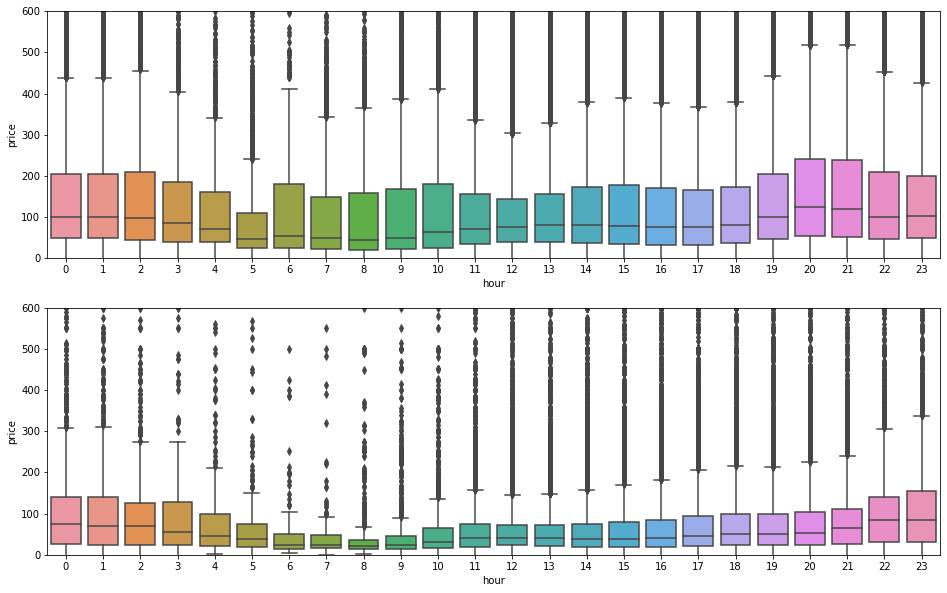

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
ax =sns.boxplot(data=up,x = 'hour',y='price')
ax.set_ylim(0,600)

plt.subplot(2,1,2)
ax =sns.boxplot(data=down,x = 'hour',y='price')
ax.set_ylim(0,600)

하위 30이 오전에 거래량과 합계가 적은 것을 볼 수 있었다.

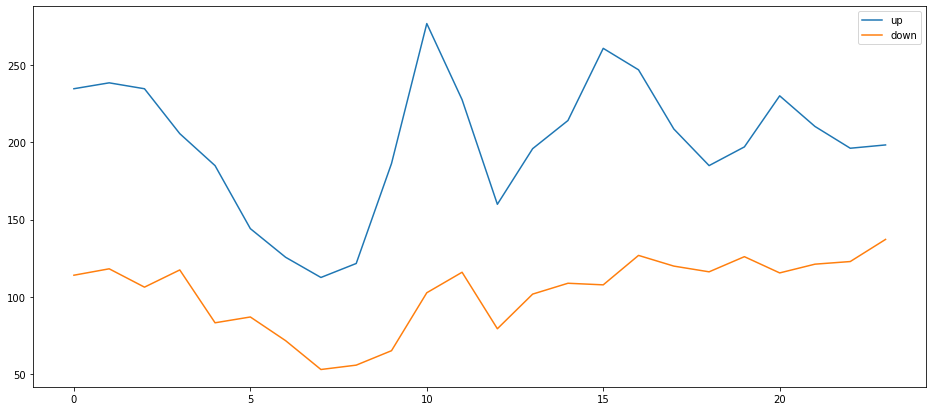

In [85]:
plt.figure(figsize=(16,7))
# 한번에 결제 하는 금액
plt.plot(up.groupby('hour')['price'].mean(), label = 'up')
# 총 결제 금액
plt.plot(down.groupby('hour')['price'].mean(), label = 'down')
plt.legend()

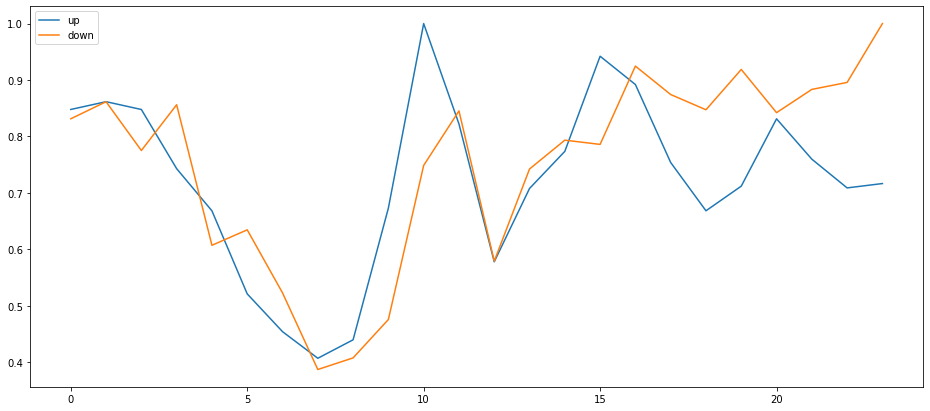

In [80]:
plt.figure(figsize=(16,7))
# 한번에 결제 하는 금액
plt.plot(up.groupby('hour')['price'].mean()/max(up.groupby('hour')['price'].mean()), label = 'up')
# 총 결제 금액
plt.plot(down.groupby('hour')['price'].mean()/max(down.groupby('hour')['price'].mean()), label = 'down')
plt.legend()

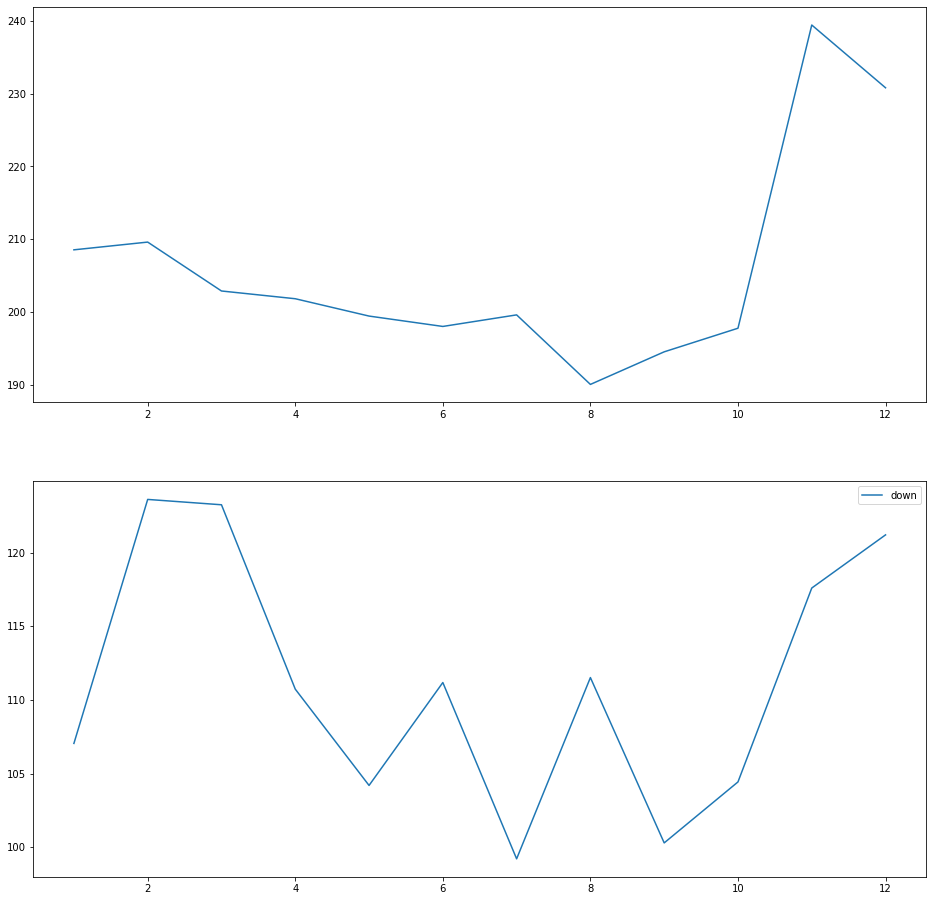

In [92]:
plt.figure(figsize=(16,16))
# 한번에 결제 하는 금액
plt.subplot(2,1,1)

plt.plot(up.groupby('month')['price'].mean(), label = 'up')
# 총 결제 금액
plt.subplot(2,1,2)

plt.plot(down.groupby('month')['price'].mean(), label = 'down')
plt.legend()

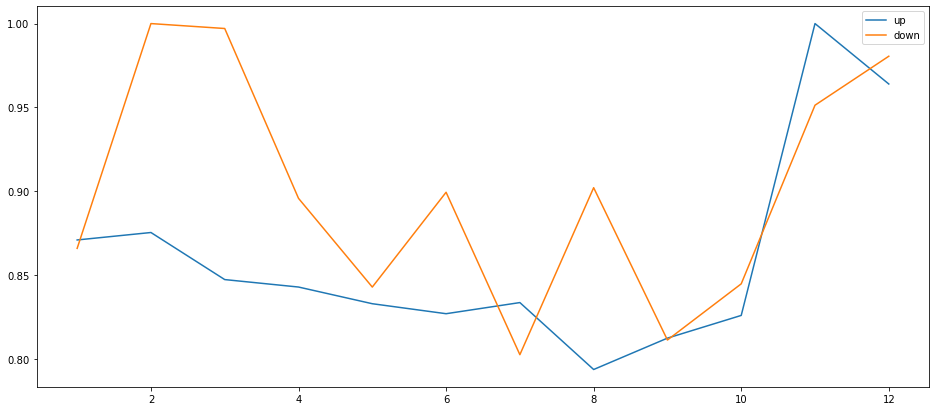

In [82]:
plt.figure(figsize=(16,7))
# 한번에 결제 하는 금액
plt.plot(up.groupby('month')['price'].mean()/max(up.groupby('month')['price'].mean()), label = 'up')
# 총 결제 금액
plt.plot(down.groupby('month')['price'].mean()/max(down.groupby('month')['price'].mean()), label = 'down')
plt.legend()

In [122]:
df['scat'] = df.price/df.price.max()

<AxesSubplot:xlabel='scat', ylabel='hour'>

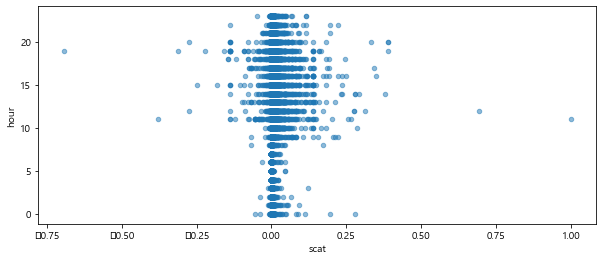

In [125]:
df.plot(kind ='scatter', x = 'scat', y = 'hour', figsize=(10, 4), alpha=0.5)

<AxesSubplot:xlabel='scat', ylabel='month'>

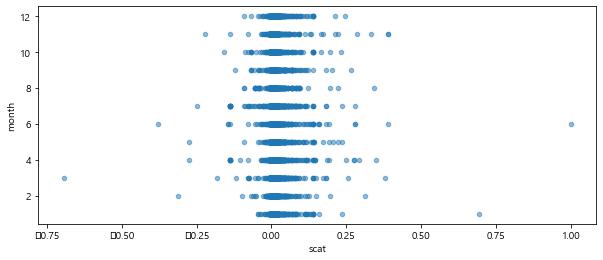

In [126]:
df.plot(kind ='scatter', x = 'scat', y = 'month', figsize=(10, 4), alpha=0.5)

<AxesSubplot:xlabel='scat', ylabel='days_of_week'>

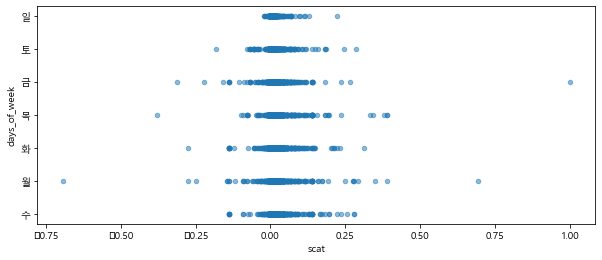

In [128]:
df.plot(kind ='scatter', x = 'scat', y = 'days_of_week', figsize=(10, 4), alpha=0.5)